#### Import the MoirePy Library 

In [1]:
from moirepy import MoireLattice, TriangularLayer, HexagonalLayer 
#from moirepy.layers import HexagonalLayer
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm, trange

#### Make a Moire lattice where each layer is represented by triangluar lattice.

In [2]:
# Call the MoireLattice class to contruct the lattice
#lattice = MoireLattice(TriangularLayer, 9, 10, 2, 2, pbc=True, k=1)
# lattice = MoireLattice(HexagonalLayer, 2, 3, 2, 1, pbc=True, k=1)
lattice = MoireLattice(TriangularLayer, 2, 3, 4, 4, pbc=True, k=1)
# Arguments are (Lattice type, a-val, b-val, x-no, y-no, pbc condition, numbers of orbitals per sites)
# This will return the rotational angle (For this you can also use angle value calculator) and number of points in each layer.

theta = 0.2299 rad (13.1736 deg)
(2736,) bool
(2736,) bool
304 points in lower lattice
304 points in upper lattice


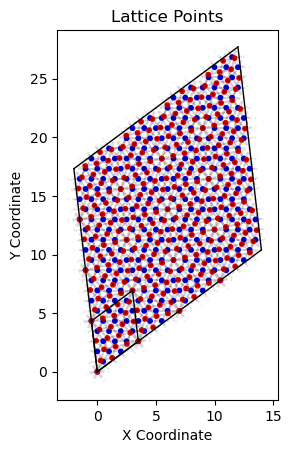

In [3]:
# plot the lattice
#plt.figure(figsize=(9, 17))
lattice.plot_lattice() 

In [9]:
## You can plot the same using matplotlib
#plt.figure(figsize=(6, 6))
#plt.scatter(lattice.lower_lattice.points[:, 0], lattice.lower_lattice.points[:, 1], s=3)
#plt.scatter(lattice.upper_lattice.points[:, 0], lattice.upper_lattice.points[:, 1], s=3)
#plt.axis('equal')

In [10]:
# Get the Moire Lattice vector
print("1st Moire Lattice Vector: ", lattice.mlv1)
print("2nd Moire Lattice Vector: ", lattice.mlv2)

1st Moire Lattice Vector:  [3.5        2.59807621]
2nd Moire Lattice Vector:  [-0.5         4.33012702]


In [11]:
# define the lower layer hopping amplitude 
def inter(this_coo, neigh_coo, this_type, neigh_type):
    # 1/distance^alpha
    alpha, d = 1.1 , 0.1
    distance = np.linalg.norm(this_coo - neigh_coo)
    return 1 / (distance**2 + d**2)**alpha

In [12]:
# define the lower layer hopping amplitude 
def t(this_coo, neigh_coo, this_type, neigh_type):
    gamma = 0.2
    t0 = 1    # hopping parameter
    theta = np.rad2deg(np.arctan2(neigh_coo[1] - this_coo[1], neigh_coo[0] - this_coo[0]))
    if -5 < theta < 5:  # this if and else conidtion is there to put anisotropy along x-axis (or x' axis)
        return t0 - gamma
    elif theta < -175 or 175 < theta:
        return t0 + gamma
    else:
        return t0

In [14]:
# Construct the Lattice Hamiltonian
ham_rel = lattice.generate_hamiltonian(t, t, inter, inter, 0 , 0)
# ham_rel = lattice.generate_hamiltonian(1, 1, .1, .1, 0 , 0)
#print(ham_rel)
ham_rel.shape

(38, 38)

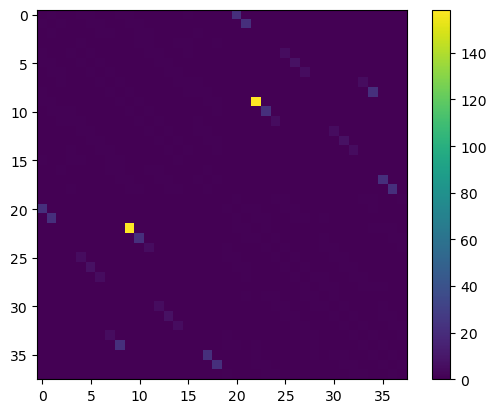

In [198]:
plt.imshow(ham_rel) # Plot the Hamiltonian
plt.colorbar()

In [199]:
(ham_rel.real - ham_rel.real.T)[(ham_rel.real - ham_rel.real.T) != 0]

array([-0.4, -0.4, -0.4, -0.4, -0.4,  0.4, -0.4,  0.4, -0.4,  0.4, -0.4,
        0.4, -0.4,  0.4, -0.4,  0.4, -0.4,  0.4,  0.4,  0.4,  0.4,  0.4])

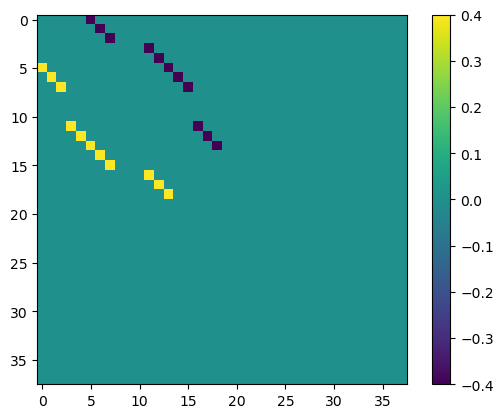

In [200]:
plt.imshow((ham_rel.real - ham_rel.real.T))
plt.colorbar()

In [201]:
# check the hermiticity of the Hamiltonian
print("Hermiticity of the Hamiltonian: ", np.allclose(ham_rel.real, ham_rel.real.T))

Hermiticity of the Hamiltonian:  False


In [202]:
# Get the eigenvalues and eigenvectors
eigenvalue, eigenvector = np.linalg.eig(ham_rel)
e = np.sort(eigenvalue)
print(e)

[-1.58532349e+02+0.j         -2.31131346e+01+0.j
 -2.21724005e+01+0.j         -2.21611260e+01+0.j
 -2.03352272e+01+0.j         -2.02798475e+01+0.j
 -1.92797262e+01+0.j         -8.29434759e+00+0.j
 -7.81629877e+00+0.j         -6.55844557e+00+0.j
 -6.44029560e+00+0.j         -5.98243186e+00-0.00470159j
 -5.98243186e+00+0.00470159j -3.51809616e+00+0.j
 -3.16617002e+00+0.j         -1.19992610e+00+0.j
 -9.72295045e-01+0.j         -8.63089800e-01+0.j
 -6.73455634e-01+0.j         -7.18260284e-02+0.j
  5.51704130e-01+0.j          1.10998347e+00+0.j
  2.36636382e+00+0.j          4.09522218e+00-0.06527873j
  4.09522218e+00+0.06527873j  4.34272338e+00+0.j
  4.86170315e+00+0.j          6.23726850e+00+0.j
  6.88738748e+00+0.j          7.28503528e+00+0.j
  9.61182572e+00+0.j          1.91472463e+01+0.j
  2.01882816e+01+0.j          2.02136106e+01+0.j
  2.22555249e+01+0.j          2.22940445e+01+0.j
  2.33361537e+01+0.j          1.58533620e+02+0.j        ]


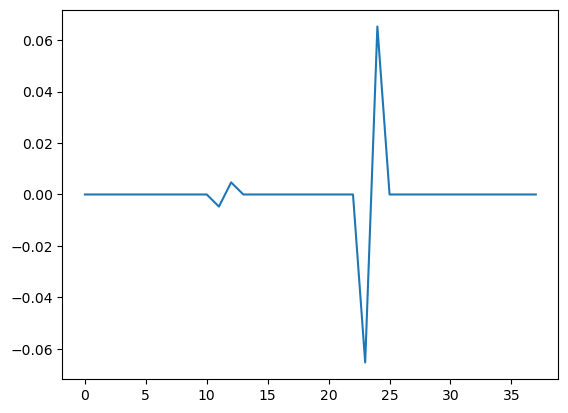

In [203]:
plt.plot(e.imag)

In [204]:
# Find a suitable energy level to study the skin effect
energy =  2.3 #2.3 #2.3 #0.02 #1 #0 # 2.3 #1.8 #2.55 #(1 + 0j) 
# energy = 0
idx = np.argmin(np.abs(eigenvalue - energy))
print(eigenvalue[idx])
print(idx)

(2.366363818726837+0j)
28


In [205]:
N = lattice.lower_lattice.points.shape[0]
R =  idx #np.random.randint(0, 2*N)

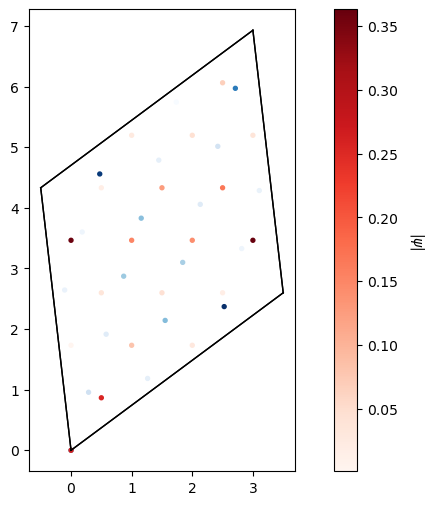

In [206]:
# Plot the states 
plt.figure(figsize=(10, 6))

nx = lattice.nx
ny = lattice.ny
mlv1 = lattice.mlv1
mlv2 = lattice.mlv2



plt.plot([0, nx*mlv1[0]], [0, nx*mlv1[1]], 'k', linewidth=1)
plt.plot([0, ny*mlv2[0]], [0, ny*mlv2[1]], 'k', linewidth=1)
plt.plot([nx*mlv1[0], nx*mlv1[0] + ny*mlv2[0]], [nx*mlv1[1], nx*mlv1[1] + ny*mlv2[1]], 'k', linewidth=1)
plt.plot([ny*mlv2[0], nx*mlv1[0] + ny*mlv2[0]], [ny*mlv2[1], nx*mlv1[1] + ny*mlv2[1]], 'k', linewidth=1)

plt.plot([0, mlv1[0]], [0, mlv1[1]], 'k', linewidth=1)
plt.plot([0, mlv2[0]], [0, mlv2[1]], 'k', linewidth=1)
plt.plot([mlv1[0], mlv1[0] + mlv2[0]], [mlv1[1], mlv1[1] + mlv2[1]], 'k', linewidth=1)
plt.plot([mlv2[0], mlv1[0] + mlv2[0]], [mlv2[1], mlv1[1] + mlv2[1]], 'k', linewidth=1)

plt.scatter(lattice.upper_lattice.points[:, 0], lattice.upper_lattice.points[:, 1], c = np.abs(eigenvector[:N, R]), cmap='Blues', s = 8)
plt.scatter(lattice.lower_lattice.points[:, 0], lattice.lower_lattice.points[:, 1], c = np.abs(eigenvector[N:, R]), cmap='Reds', s = 8)
plt.gca().set_aspect('equal', adjustable='box')
dbar = plt.colorbar()  

#set the two color bar for upper and lower points
dbar.set_label(r'$|\psi|$', rotation = 270, labelpad = 20, fontsize=10)

In [207]:
# Get the density of states


In [208]:
# K Space Lattice Vectors
# Find the area by doing cross product of mlv1 and mlv2

# Get Moire Lattice Vectors
mlv1 = np.array(lattice.mlv1)  # Assuming this is a tuple or list (x, y)
mlv2 = np.array(lattice.mlv2)  # Same assumption

# Compute the 2D cross product (area of the parallelogram)
moire_area = abs(np.cross(mlv1, mlv2))

# Print results
print("1st Moire Lattice Vector: ", mlv1)
print("2nd Moire Lattice Vector: ", mlv2)
print("Moire Lattice Area: ", moire_area)


1st Moire Lattice Vector:  [3.5        2.59807621]
2nd Moire Lattice Vector:  [-0.5         4.33012702]
Moire Lattice Area:  16.454482671904334


/tmp/ipykernel_7503/3574193885.py:9: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  moire_area = abs(np.cross(mlv1, mlv2))


In [209]:
# Prefactor (2π / Area)
prefactor = (2 * np.pi) / moire_area

# Compute K-space lattice vectors
k1 = prefactor * np.array([mlv2[1], -mlv2[0]])  # (lv2_y, -lv2_x)
k2 = prefactor * np.array([-mlv1[1], mlv1[0]])  # (-lv1_y, lv1_x)

print("1st Moire Lattice Vector: ", k1)
print("2nd Moire Lattice Vector: ", k2)

1st Moire Lattice Vector:  [1.65346982 0.19092625]
2nd Moire Lattice Vector:  [-0.99208189  1.33648374]


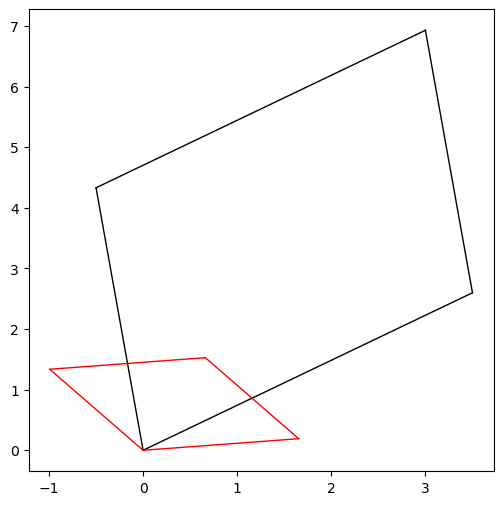

In [210]:
# plot lv1 and lv2 
plt.figure(figsize=(6, 6))  
plt.plot([0, mlv1[0]], [0, mlv1[1]], 'k', linewidth=1)
plt.plot([0, mlv2[0]], [0, mlv2[1]], 'k', linewidth=1)
plt.plot([mlv1[0], mlv1[0] + mlv2[0]], [mlv1[1], mlv1[1] + mlv2[1]], 'k', linewidth=1)
plt.plot([mlv2[0], mlv1[0] + mlv2[0]], [mlv2[1], mlv1[1] + mlv2[1]], 'k', linewidth=1)

# plot k1 and k2
plt.plot([0, k1[0]], [0, k1[1]], 'r', linewidth=1)
plt.plot([0, k2[0]], [0, k2[1]], 'r', linewidth=1)
plt.plot([k1[0], k1[0] + k2[0]], [k1[1], k1[1] + k2[1]], 'r', linewidth=1)
plt.plot([k2[0], k1[0] + k2[0]], [k2[1], k1[1] + k2[1]], 'r', linewidth=1)


In [211]:
N1, N2 = 2, 2
for i in range(N1):
    for j in range(N2):
        k = (i/N1)*k1[0] + (j/N2)*k2[0], (i/N1)*k1[1] + (j/N2)*k2[1]
        print(k)

(np.float64(0.0), np.float64(0.0))
(np.float64(-0.49604094530365156), np.float64(0.6682418710336592))
(np.float64(0.8267349088394194), np.float64(0.09546312443337981))
(np.float64(0.3306939635357678), np.float64(0.763704995467039))


In [212]:
import numpy as np
eig = []
# Number of unit cells along mlv1 and mlv2
N1, N2 = 1, 1  # Adjust as needed

for i in range(N1):
    for j in range(N2):
        h = lattice.generate_k_space_hamiltonian(
    np.array([(i/N1)*k1[0] + (j/N2)*k2[0], (i/N1)*k1[1] + (j/N2)*k2[1]]),
    1, 1, .1, .1, 0 , 0
    )
    eq, _ = np.linalg.eig(h)
    ee = np.sort(eq.real)
    eig.append(ee)

In [213]:
eig 

[array([-2.38514248, -2.37770247, -2.36412351, -2.36412351, -2.3554212 ,
        -2.3554212 , -2.22553423, -2.22553423, -2.21300247, -2.21300247,
        -2.19560691, -2.18514248, -1.32187616, -1.29770568, -1.29633484,
        -1.29633484, -1.28162574, -1.28162574, -1.15154924, -1.15154924,
        -1.14444195, -1.14119987, -1.14119987, -1.12187616,  2.40701864,
         2.40805422,  2.40805422,  2.41430312,  2.41430312,  2.42214442,
         2.5933126 ,  2.60035756,  2.60035756,  2.60607618,  2.60607618,
         2.60701864,  5.9       ,  6.1       ])]

In [214]:
np.allclose(e, eig)

False

In [215]:
ham = lattice.generate_k_space_hamiltonian(
    np.array([0, 0]),
    1, 1, inter, inter, 0 , 0
    )

eig, _ = np.linalg.eig(ham.real)
E = np.sort(eig.real)

In [216]:
np.allclose(ham_rel.real,ham.real)

False

In [217]:
#print(E.real)

In [218]:
np.allclose(eigenvalue.real, eig.real)

False

In [219]:
# Define k-space grid
kx_values = np.linspace(-np.pi, np.pi, 100)
ky_values = np.linspace(-np.pi, np.pi, 100)
kx_grid, ky_grid = np.meshgrid(kx_values, ky_values)

# Store eigenvalues
eigenvalues = []

# Compute eigenvalues for each (kx, ky)
for i, kx in enumerate(tqdm(kx_values, desc="kx loop")):
    a = []
    for j, ky in enumerate(ky_values):
        ham = lattice.generate_k_space_hamiltonian(
            np.array([kx, ky]), 1, 1, inter, inter, 0, 0
        )
        eig, _ = np.linalg.eig(ham.real)  # Compute eigenvalues
        eig = np.sort(eig)  # Sort eigenvalues in ascending order
        a.append(eig)  # Store nth eigenvalue
    eigenvalues.append(a)
eigenvalues = np.array(eigenvalues)

kx loop: 100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


In [220]:
eigenvalues.shape

(100, 100, 38)

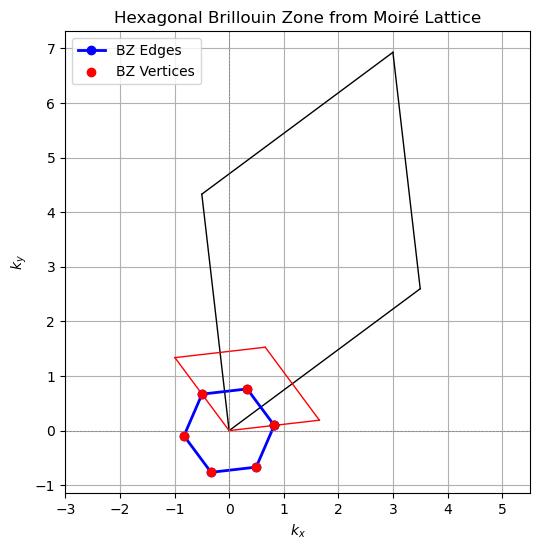

In [221]:
v1 = k1 / 2
v2 = k2 / 2
v3 = (k1 + k2) / 2
v4 = -k1 / 2
v5 = -k2 / 2
v6 = -(k1 + k2) / 2

# It is important to order these vertices to trace out a hexagon.
# A convenient ordering is:
bz_hexagon = np.array([v1, v3, v2, v4, v6, v5, v1])  # closing the loop
# plot lv1 and lv2 
plt.figure(figsize=(6, 6))  
plt.plot([0, mlv1[0]], [0, mlv1[1]], 'k', linewidth=1)
plt.plot([0, mlv2[0]], [0, mlv2[1]], 'k', linewidth=1)
plt.plot([mlv1[0], mlv1[0] + mlv2[0]], [mlv1[1], mlv1[1] + mlv2[1]], 'k', linewidth=1)
plt.plot([mlv2[0], mlv1[0] + mlv2[0]], [mlv2[1], mlv1[1] + mlv2[1]], 'k', linewidth=1)

# plot k1 and k2
plt.plot([0, k1[0]], [0, k1[1]], 'r', linewidth=1)
plt.plot([0, k2[0]], [0, k2[1]], 'r', linewidth=1)
plt.plot([k1[0], k1[0] + k2[0]], [k1[1], k1[1] + k2[1]], 'r', linewidth=1)
plt.plot([k2[0], k1[0] + k2[0]], [k2[1], k1[1] + k2[1]], 'r', linewidth=1)
plt.plot(bz_hexagon[:, 0], bz_hexagon[:, 1], 'bo-', linewidth=2, label="BZ Edges")
plt.scatter([v1[0], v2[0], v3[0], v4[0], v5[0], v6[0]],
            [v1[1], v2[1], v3[1], v4[1], v5[1], v6[1]],
            color='red', zorder=5, label="BZ Vertices")

plt.xlabel("$k_x$")
plt.ylabel("$k_y$")
plt.title("Hexagonal Brillouin Zone from Moiré Lattice")
plt.axhline(0, color='gray', linestyle="--", linewidth=0.5)
plt.axvline(0, color='gray', linestyle="--", linewidth=0.5)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


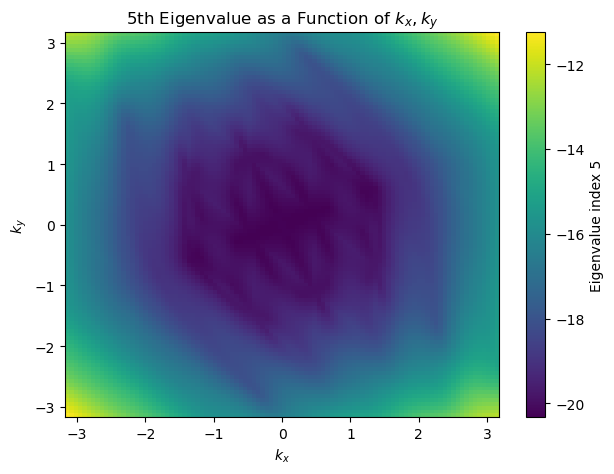

<Figure size 600x600 with 0 Axes>

In [222]:
# Choose which eigenvalue index to plot
n = 5 # Change this to select a different eigenvalue

# Plot the nth eigenvalue as a function of kx, ky
plt.figure(figsize=(7, 5))
plt.pcolormesh(kx_grid, ky_grid, eigenvalues[:, :, n], shading="auto", cmap="viridis")
plt.colorbar(label=f"Eigenvalue index {n}")
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")
plt.title(f"{n}th Eigenvalue as a Function of $k_x, k_y$")
plt.figure(figsize=(6,6))
#here show the k1 and k2 vectors
#plt.plot([0, k1[0]], [0, k1[1]], 'r', linewidth=1)
#plt.plot([0, k2[0]], [0, k2[1]], 'r', linewidth=1)
#plt.plot([k1[0], k1[0] + k2[0]], [k1[1], k1[1] + k2[1]], 'r', linewidth=1)
#plt.plot([k2[0], k1[0] + k2[0]], [k2[1], k1[1] + k2[1]], 'r', linewidth=1)
#plt.gca().set_aspect('equal', adjustable='box')

plt.show()

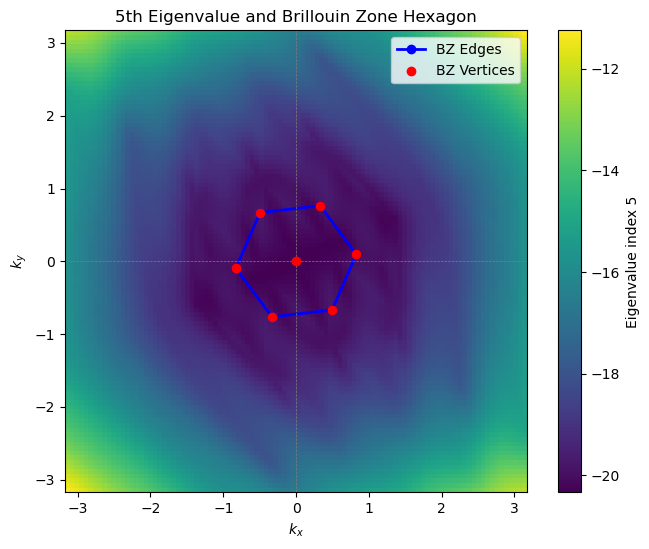

In [223]:
# Define k1 and k2 vectors
# Compute the hexagon vertices
v1 = k1 / 2
v2 = k2 / 2
v3 = (k1 + k2) / 2
v4 = -k1 / 2
v5 = -k2 / 2
v6 = -(k1 + k2) / 2
v7 = np.array([0, 0])  # Origin
# Ordering vertices to form a hexagon (closing the loop)
bz_hexagon = np.array([v1, v3, v2, v4, v6, v5, v1])
# Choose which eigenvalue index to plot
n = 5  # Change this to select a different eigenvalue

# Create a single figure and axes
plt.figure(figsize=(8, 6))

# Plot the eigenvalue as a function of kx, ky
pcm = plt.pcolormesh(kx_grid, ky_grid, eigenvalues[:, :, n], shading="auto", cmap="viridis")
plt.colorbar(pcm, label=f"Eigenvalue index {n}")

# Overlay the Brillouin Zone (BZ) hexagon
plt.plot(bz_hexagon[:, 0], bz_hexagon[:, 1], 'bo-', linewidth=2, label="BZ Edges")
plt.scatter([v1[0], v2[0], v3[0], v4[0], v5[0], v6[0], v7[0]],
            [v1[1], v2[1], v3[1], v4[1], v5[1], v6[1], v7[1]],
            color='red', zorder=5, label="BZ Vertices")

# Optionally, display the k1 and k2 vectors on the same plot
#plt.plot([0, k1[0]], [0, k1[1]], 'r', linewidth=1, label="k1")
#plt.plot([0, k2[0]], [0, k2[1]], 'r', linewidth=1, label="k2")
#plt.plot([k1[0], k1[0] + k2[0]], [k1[1], k1[1] + k2[1]], 'r', linewidth=1)
#plt.plot([k2[0], k1[0] + k2[0]], [k2[1], k1[1] + k2[1]], 'r', linewidth=1)

# Add grid lines and aspect settings
plt.axhline(0, color='gray', linestyle="--", linewidth=0.5)
plt.axvline(0, color='gray', linestyle="--", linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Set labels and title
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")
plt.title(f"{n}th Eigenvalue and Brillouin Zone Hexagon")
plt.legend()

plt.show()


In [245]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define high-symmetry points
Gamma = np.array([0, 0])
M = np.array([k2[0] / 4, k2[1] / 4])
K = np.array([k1[0] / 2, k1[1] / 2])
k = np.array([(k1[0] + k2[0]) / 2, (k1[1] + k2[1]) / 2])  # Midpoint

# Discretize the high-symmetry path: Γ → M → K → Γ
num_k = 40  # Points per segment
k_path = np.concatenate([
    np.linspace(Gamma, k, num_k),
    np.linspace(k, M, num_k),
    np.linspace(M, K, num_k),
    np.linspace(K, Gamma, num_k)
])

# Number of total k-points
num_total_k = k_path.shape[0]


In [262]:
# Store eigenvalues
eigenvalues = []

# Loop over k-points
for k_vec in tqdm(k_path, desc="Computing band structure"):
    ham = lattice.generate_k_space_hamiltonian(k_vec, 1, 1, 0.02, 0.02, 0, 0)
    eig, _ = np.linalg.eig(ham.real)  # Compute and sort eigenvalues
    eigenvalues.append(np.sort(eig))

# Convert to NumPy array
eigenvalues = np.array(eigenvalues)  # Shape: (num_total_k, num_bands)


Computing band structure:   0%|          | 0/160 [00:00<?, ?it/s]

Computing band structure: 100%|██████████| 160/160 [00:01<00:00, 135.96it/s]


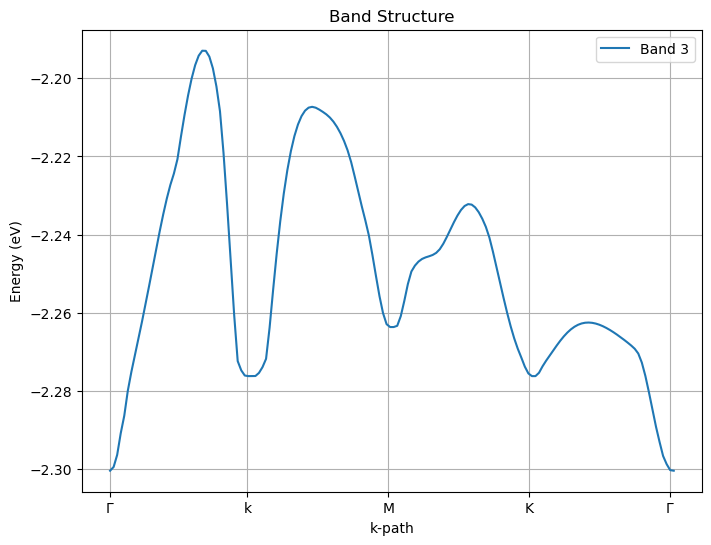

In [263]:
# Define the k-axis (distance along the path)
k_distances = np.linspace(0, num_total_k, num_total_k)

# Choose which band to plot (0-based index)
band_index = 2

plt.figure(figsize=(8, 6))
plt.plot(k_distances, eigenvalues[:, band_index], label=f"Band {band_index + 1}")

# Add high-symmetry point markers
#plt.xticks([0, num_k, 2 * num_k, 3 * num_k], [r"$\Gamma$", "M", "K", r"$\Gamma$"])
xtick_positions = [0, num_k - 1, 2*num_k - 1, 3*num_k - 1, 4*num_k - 1]
xtick_labels = [r"$\Gamma$", "k", "M", "K", r"$\Gamma$"]

plt.xticks(xtick_positions, xtick_labels)
plt.ylabel("Energy (eV)")
plt.xlabel("k-path")
plt.title("Band Structure")
plt.legend()
plt.grid(True)
plt.show()


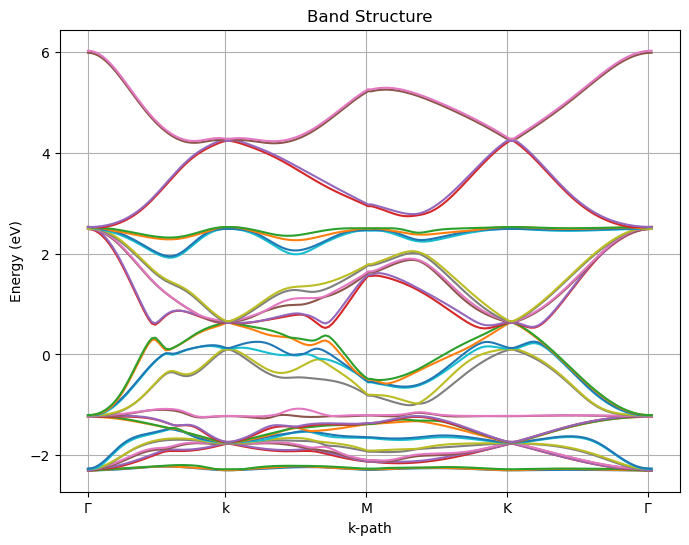

In [264]:
# Define the k-axis (distance along the path)
k_distances = np.linspace(0, num_total_k, num_total_k)

# List of band indices you want to plot (0-based)
band_indices = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 , 14 ,15 ,16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

plt.figure(figsize=(8, 6))

# Loop over the desired bands and plot each one
for band_index in band_indices:
    plt.plot(k_distances, eigenvalues[:, band_index],
             label=f"Band {band_index + 1}")

# Set high-symmetry point markers based on your k-path segmentation
xtick_positions = [0, num_k - 1, 2*num_k - 1, 3*num_k - 1, 4*num_k - 1]
xtick_labels = [r"$\Gamma$", "k", "M", "K", r"$\Gamma$"]

plt.xticks(xtick_positions, xtick_labels)
plt.ylabel("Energy (eV)")
plt.xlabel("k-path")
plt.title("Band Structure")
#plt.legend()
plt.grid(True)
plt.show()


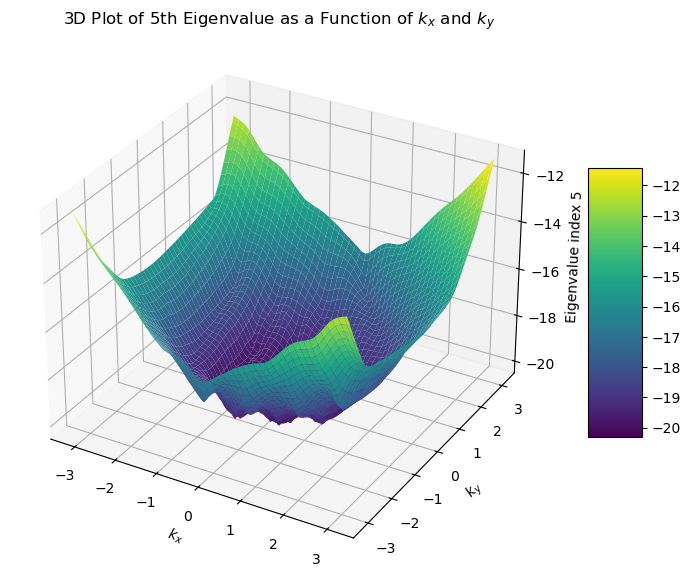

In [64]:
# Create a 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(kx_grid, ky_grid, eigenvalues[:, :, n], cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_zlabel(f'Eigenvalue index {n}')
ax.set_title(f'3D Plot of {n}th Eigenvalue as a Function of $k_x$ and $k_y$')
# ax.set_zlim(-158.8, -158.4)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()